Tyler Grande
Lab 4

1) I understand that this file is about graphs on different plots and arrays, it shows how each function works
2) In datacleaning it shows the steps or methods we can use to clean up data through removing NAs in rows and columns, handing nulls or NaN's etc.

3) The data contains non integer values, including true/false and yes/no, there is alot of data that we may not want to look at, all at once.

In [1]:
import pandas as pd
df = pd.read_csv('churn.csv')
result = df.head(10)
print(result)


  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes         no   
8    LA             117        408  335-4719         no         no   
9    WV             141        415  330-8173        yes        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103  

There are lots of columns, difficult to make sense of anything using python. Still non integer values, also floats.



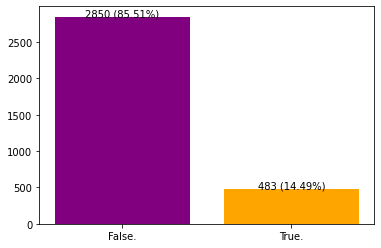

In [7]:
import matplotlib.pyplot as plt"
df = pd.read_csv("churn.csv")
counts = df['Churn?'].value_counts()
total_count = len(df)
percentages = counts / total_count * 100
plt.bar(counts.index.astype(str), counts, color=['purple', 'orange'])
for i in range(len(counts)):
    plt.text(i, counts[i] + 5, f'{counts[i]} ({percentages[i]:.2f}%)',ha='center')
plt.show()


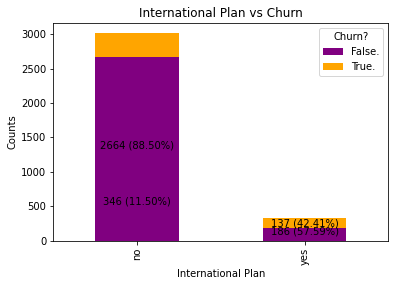

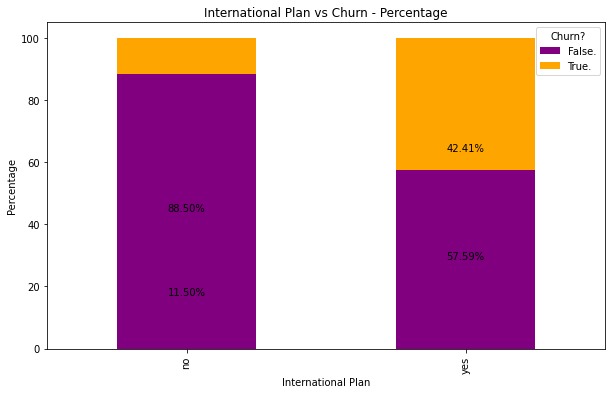

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("churn.csv")


counts = df.groupby(['Int\'l Plan', 'Churn?']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


ax = counts.plot(kind='bar', stacked=True, color=['purple', 'orange'])
ax.set_title("International Plan vs Churn")
ax.set_ylabel("Counts")
ax.set_xlabel("International Plan")
for i in range(len(counts)):
    for j in range(len(counts.columns)):
        ax.text(i, counts.iloc[i, j] / 2 + j * counts.iloc[i, j], f'{counts.iloc[i, j]} ({percentages.iloc[i, j]:.2f}%)', ha='center')

plt.show()




ax2 = percentages.plot(kind='bar', stacked=True, color=['purple', 'orange'], figsize=(10, 6))
ax2.set_title("International Plan vs Churn - Percentage")
ax2.set_ylabel("Percentage")
ax2.set_xlabel("International Plan")
for i in range(len(percentages)):
    for j in range(len(percentages.columns)):
        ax2.text(i, percentages.iloc[i, j] / 2 + j * percentages.iloc[i, j], f'{percentages.iloc[i, j]:.2f}%', ha='center')

plt.show()

In [24]:
import pandas as pd


df = pd.read_csv("churn.csv")

contingency_with_totals = pd.crosstab(df["Int'l Plan"], df['Churn?'], margins=True, margins_name="Total")
print(contingency_with_totals)


Churn?      False.  True.  Total
Int'l Plan                      
no            2664    346   3010
yes            186    137    323
Total         2850    483   3333


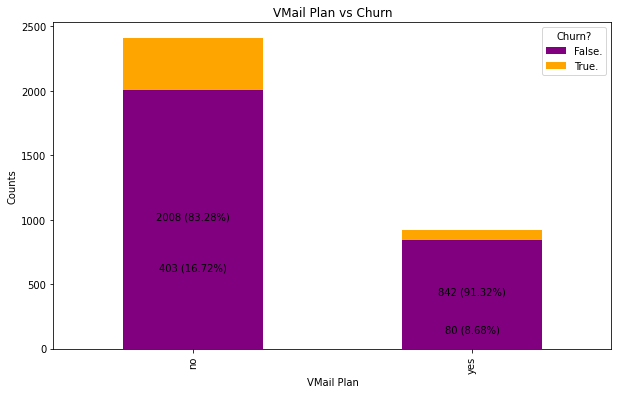

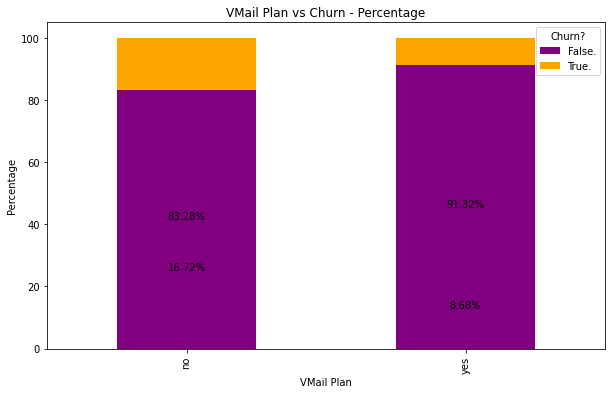

Churn?      False.  True.  Total
VMail Plan                      
no            2008    403   2411
yes            842     80    922
Total         2850    483   3333


In [28]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("churn.csv")

counts = df.groupby(['VMail Plan', 'Churn?']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100


ax1 = counts.plot(kind='bar', stacked=True, color=['purple', 'orange'], figsize=(10, 6))
ax1.set_title("VMail Plan vs Churn")
ax1.set_ylabel("Counts")
ax1.set_xlabel("VMail Plan")
for i in range(len(counts)):
    for j in range(len(counts.columns)):
        ax1.text(i, counts.iloc[i, j] / 2 + j * counts.iloc[i, j], f'{counts.iloc[i, j]} ({percentages.iloc[i, j]:.2f}%)', ha='center')

plt.show()


ax2 = percentages.plot(kind='bar', stacked=True, color=['purple', 'orange'], figsize=(10, 6))
ax2.set_title("VMail Plan vs Churn - Percentage")
ax2.set_ylabel("Percentage")
ax2.set_xlabel("VMail Plan")
for i in range(len(percentages)):
    for j in range(len(percentages.columns)):
        ax2.text(i, percentages.iloc[i, j] / 2 + j * percentages.iloc[i, j], f'{percentages.iloc[i, j]:.2f}%', ha='center')

plt.show()
contingency_vmail = pd.crosstab(df["VMail Plan"], df['Churn?'], margins=True, margins_name="Total")
print(contingency_vmail)

In [29]:
import pandas as pd

df = pd.read_csv("churn.csv")

columns = ['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
           'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
           'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']


stats = {
    'Mean': df[columns].mean(),
    'Median': df[columns].median(),
    'Standard Deviation': df[columns].std(),
    'Minimum': df[columns].min(),
    'Maximum': df[columns].max()
}


stats_df = pd.DataFrame(stats).transpose()

print(stats_df)


                    VMail Message    Day Mins   Day Calls  Day Charge  \
Mean                     8.099010  179.775098  100.435644   30.562307   
Median                   0.000000  179.400000  101.000000   30.500000   
Standard Deviation      13.688365   54.467389   20.069084    9.259435   
Minimum                  0.000000    0.000000    0.000000    0.000000   
Maximum                 51.000000  350.800000  165.000000   59.640000   

                      Eve Mins   Eve Calls  Eve Charge  Night Mins  \
Mean                200.980348  100.114311   17.083540  200.872037   
Median              201.400000  100.000000   17.120000  201.200000   
Standard Deviation   50.713844   19.922625    4.310668   50.573847   
Minimum               0.000000    0.000000    0.000000   23.200000   
Maximum             363.700000  170.000000   30.910000  395.000000   

                    Night Calls  Night Charge  Intl Mins  Intl Calls  \
Mean                 100.107711      9.039325  10.237294    4.479448

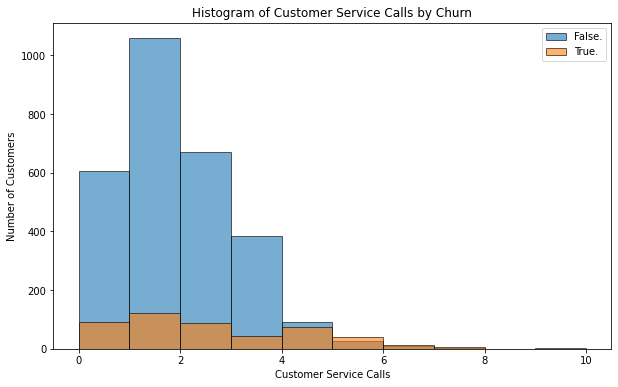

In [30]:
# Histogram for Customer Service Calls by Churn
plt.figure(figsize=(10, 6))
for churn_value in df['Churn?'].unique():
    subset = df[df['Churn?'] == churn_value]
    plt.hist(subset['CustServ Calls'], alpha=0.6, label=churn_value, bins=range(0, 11, 1), edgecolor='black')

plt.title("Histogram of Customer Service Calls by Churn")
plt.xlabel("Customer Service Calls")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


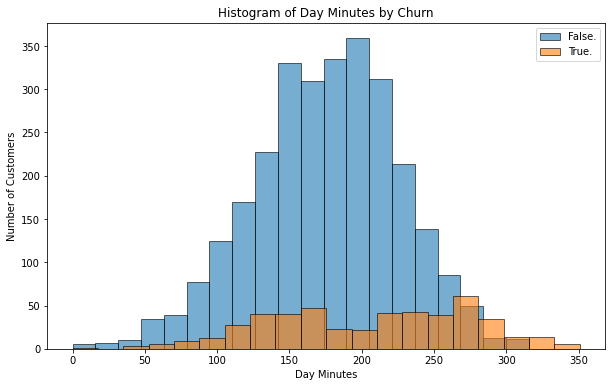

In [31]:
plt.figure(figsize=(10, 6))
for churn_value in df['Churn?'].unique():
    subset = df[df['Churn?'] == churn_value]
    plt.hist(subset['Day Mins'], alpha=0.6, label=churn_value, bins=20, edgecolor='black')

plt.title("Histogram of Day Minutes by Churn")
plt.xlabel("Day Minutes")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


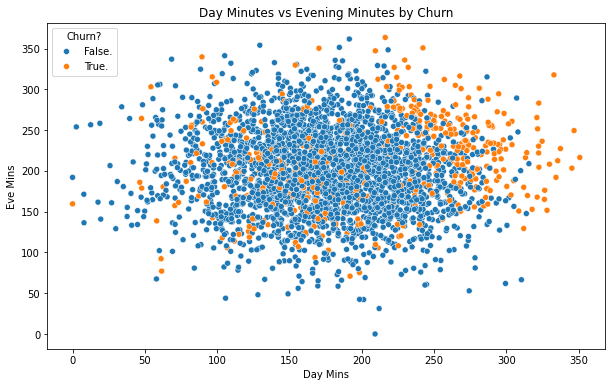

In [32]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Day Mins", y="Eve Mins", hue="Churn?", data=df)
plt.title("Day Minutes vs Evening Minutes by Churn")
plt.show()


In [33]:
df['Calls Category'] = ['Low' if x < 4 else 'High' for x in df['CustServ Calls']]
churn_rate = df.groupby('Calls Category')['Churn?'].value_counts(normalize=True).unstack().fillna(0) * 100
print(churn_rate)


Churn?             False.      True.
Calls Category                      
High            48.314607  51.685393
Low             88.747554  11.252446


<Figure size 576x432 with 0 Axes>

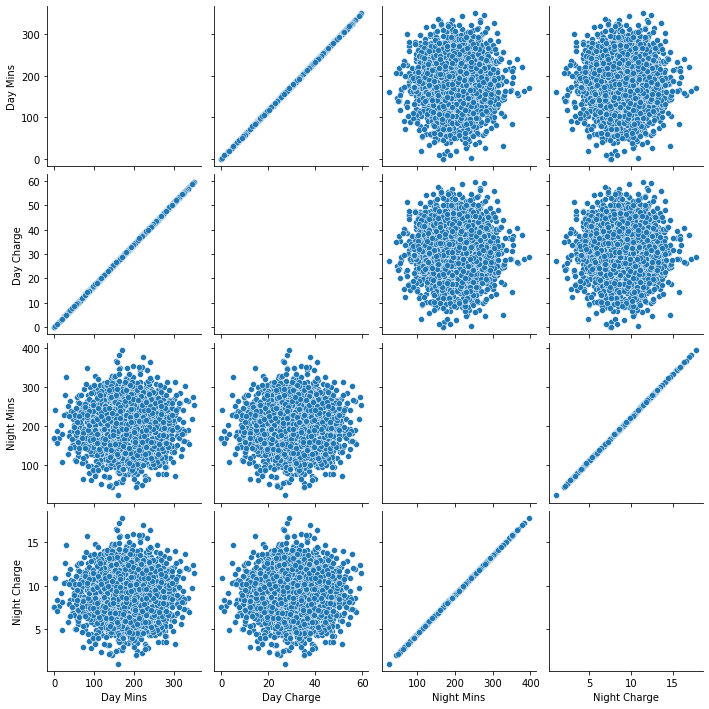

In [35]:
import seaborn as sns
matrix = df[['Day Mins', 'Day Charge', 'Night Mins', 'Night Charge']]
11
plt.figure(figsize=(8, 6))
sns.pairplot(matrix, diag_kind='none')
plt.show()
